## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  64.506065  1174.476219  0.506570  10.632854  1.529971
1  57.534603   875.417154  0.276500   6.003496  1.465398
2  54.612314   720.265497  0.763648   9.270452  1.398022
3  51.805267   357.581895  0.420653   9.212963  1.210895
4  36.464656   163.661285  0.433180   2.287758  1.225846


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0186207	total: 112ms	remaining: 1m 51s
1:	learn: 1.0084994	total: 114ms	remaining: 56.9s
2:	learn: 0.9989912	total: 115ms	remaining: 38.2s
3:	learn: 0.9873408	total: 116ms	remaining: 28.9s
4:	learn: 0.9747873	total: 117ms	remaining: 23.2s
5:	learn: 0.9626059	total: 118ms	remaining: 19.6s
6:	learn: 0.9507320	total: 120ms	remaining: 17s
7:	learn: 0.9404268	total: 121ms	remaining: 15s
8:	learn: 0.9303150	total: 123ms	remaining: 13.5s
9:	learn: 0.9186066	total: 123ms	remaining: 12.2s
10:	learn: 0.9099068	total: 125ms	remaining: 11.3s
11:	learn: 0.8985321	total: 126ms	remaining: 10.4s
12:	learn: 0.8882549	total: 127ms	remaining: 9.63s
13:	learn: 0.8815202	total: 128ms	remaining: 9.01s
14:	learn: 0.8730880	total: 129ms	remaining: 8.47s
15:	learn: 0.8617836	total: 131ms	remaining: 8.03s
16:	learn: 0.8529083	total: 132ms	remaining: 7.63s
17:	learn: 0.8441085	total: 134ms	remaining: 7.29s
18:	learn: 0.8328607	total: 134ms	remaining: 6.94s
19:	learn: 0.8

35:	learn: 0.7093693	total: 173ms	remaining: 4.64s
36:	learn: 0.7012267	total: 175ms	remaining: 4.54s
37:	learn: 0.6949071	total: 176ms	remaining: 4.45s
38:	learn: 0.6878476	total: 178ms	remaining: 4.4s
39:	learn: 0.6815781	total: 181ms	remaining: 4.36s
40:	learn: 0.6757680	total: 186ms	remaining: 4.35s
41:	learn: 0.6699523	total: 188ms	remaining: 4.28s
42:	learn: 0.6625084	total: 189ms	remaining: 4.21s
43:	learn: 0.6559775	total: 191ms	remaining: 4.16s
44:	learn: 0.6494609	total: 192ms	remaining: 4.08s
45:	learn: 0.6420863	total: 194ms	remaining: 4.02s
46:	learn: 0.6356392	total: 197ms	remaining: 3.98s
47:	learn: 0.6293896	total: 198ms	remaining: 3.92s
48:	learn: 0.6221761	total: 199ms	remaining: 3.87s
49:	learn: 0.6172819	total: 200ms	remaining: 3.8s
50:	learn: 0.6119033	total: 201ms	remaining: 3.74s
51:	learn: 0.6069615	total: 202ms	remaining: 3.68s
52:	learn: 0.5999783	total: 202ms	remaining: 3.61s
53:	learn: 0.5953433	total: 203ms	remaining: 3.56s
54:	learn: 0.5896554	total: 205ms

91:	learn: 0.4260947	total: 271ms	remaining: 2.71s
92:	learn: 0.4228034	total: 274ms	remaining: 2.7s
93:	learn: 0.4190128	total: 278ms	remaining: 2.7s
94:	learn: 0.4153887	total: 290ms	remaining: 2.79s
95:	learn: 0.4121296	total: 291ms	remaining: 2.77s
96:	learn: 0.4088817	total: 292ms	remaining: 2.75s
97:	learn: 0.4059655	total: 293ms	remaining: 2.73s
98:	learn: 0.4034212	total: 294ms	remaining: 2.7s
99:	learn: 0.4000585	total: 295ms	remaining: 2.68s
100:	learn: 0.3963731	total: 296ms	remaining: 2.66s
101:	learn: 0.3934485	total: 297ms	remaining: 2.64s
102:	learn: 0.3904775	total: 298ms	remaining: 2.62s
103:	learn: 0.3879650	total: 300ms	remaining: 2.6s
104:	learn: 0.3851599	total: 302ms	remaining: 2.6s
105:	learn: 0.3824076	total: 304ms	remaining: 2.58s
106:	learn: 0.3789362	total: 304ms	remaining: 2.56s
107:	learn: 0.3757147	total: 307ms	remaining: 2.56s
108:	learn: 0.3726378	total: 308ms	remaining: 2.54s
109:	learn: 0.3697861	total: 309ms	remaining: 2.52s
110:	learn: 0.3667080	tota

129:	learn: 0.3204950	total: 336ms	remaining: 2.27s
130:	learn: 0.3182701	total: 339ms	remaining: 2.26s
131:	learn: 0.3163657	total: 340ms	remaining: 2.25s
132:	learn: 0.3144926	total: 350ms	remaining: 2.3s
133:	learn: 0.3126253	total: 356ms	remaining: 2.31s
134:	learn: 0.3107067	total: 357ms	remaining: 2.31s
135:	learn: 0.3084932	total: 358ms	remaining: 2.29s
136:	learn: 0.3064903	total: 359ms	remaining: 2.28s
137:	learn: 0.3045412	total: 369ms	remaining: 2.32s
138:	learn: 0.3026084	total: 372ms	remaining: 2.32s
139:	learn: 0.3006078	total: 373ms	remaining: 2.31s
140:	learn: 0.2984567	total: 375ms	remaining: 2.3s
141:	learn: 0.2967317	total: 378ms	remaining: 2.3s
142:	learn: 0.2946136	total: 381ms	remaining: 2.3s
143:	learn: 0.2928200	total: 382ms	remaining: 2.28s
144:	learn: 0.2912422	total: 383ms	remaining: 2.27s
145:	learn: 0.2891568	total: 412ms	remaining: 2.42s
146:	learn: 0.2873659	total: 418ms	remaining: 2.44s
147:	learn: 0.2853952	total: 420ms	remaining: 2.43s
148:	learn: 0.28

166:	learn: 0.2542285	total: 492ms	remaining: 2.47s
167:	learn: 0.2526281	total: 497ms	remaining: 2.48s
168:	learn: 0.2513917	total: 499ms	remaining: 2.47s
169:	learn: 0.2497651	total: 500ms	remaining: 2.46s
170:	learn: 0.2479616	total: 503ms	remaining: 2.45s
171:	learn: 0.2468076	total: 504ms	remaining: 2.44s
172:	learn: 0.2455713	total: 506ms	remaining: 2.43s
173:	learn: 0.2441170	total: 507ms	remaining: 2.42s
174:	learn: 0.2429451	total: 510ms	remaining: 2.42s
175:	learn: 0.2416642	total: 510ms	remaining: 2.4s
176:	learn: 0.2406410	total: 511ms	remaining: 2.39s
177:	learn: 0.2392012	total: 512ms	remaining: 2.38s
178:	learn: 0.2381892	total: 523ms	remaining: 2.41s
179:	learn: 0.2368657	total: 524ms	remaining: 2.4s
180:	learn: 0.2353156	total: 526ms	remaining: 2.39s
181:	learn: 0.2338441	total: 527ms	remaining: 2.38s
182:	learn: 0.2324810	total: 529ms	remaining: 2.37s
183:	learn: 0.2310970	total: 531ms	remaining: 2.37s
184:	learn: 0.2298615	total: 532ms	remaining: 2.35s
185:	learn: 0.

238:	learn: 0.1738648	total: 622ms	remaining: 1.99s
239:	learn: 0.1728873	total: 629ms	remaining: 2s
240:	learn: 0.1717914	total: 630ms	remaining: 1.99s
241:	learn: 0.1709086	total: 633ms	remaining: 1.99s
242:	learn: 0.1702284	total: 633ms	remaining: 1.98s
243:	learn: 0.1694591	total: 634ms	remaining: 1.97s
244:	learn: 0.1687259	total: 635ms	remaining: 1.97s
245:	learn: 0.1679434	total: 637ms	remaining: 1.96s
246:	learn: 0.1672786	total: 638ms	remaining: 1.95s
247:	learn: 0.1667049	total: 640ms	remaining: 1.95s
248:	learn: 0.1660700	total: 641ms	remaining: 1.94s
249:	learn: 0.1653005	total: 642ms	remaining: 1.93s
250:	learn: 0.1645477	total: 644ms	remaining: 1.93s
251:	learn: 0.1637887	total: 645ms	remaining: 1.92s
252:	learn: 0.1630390	total: 647ms	remaining: 1.92s
253:	learn: 0.1623807	total: 649ms	remaining: 1.92s
254:	learn: 0.1614428	total: 650ms	remaining: 1.91s
255:	learn: 0.1607192	total: 653ms	remaining: 1.91s
256:	learn: 0.1600691	total: 655ms	remaining: 1.9s
257:	learn: 0.15

300:	learn: 0.1341553	total: 750ms	remaining: 1.75s
301:	learn: 0.1336798	total: 753ms	remaining: 1.75s
302:	learn: 0.1333367	total: 754ms	remaining: 1.74s
303:	learn: 0.1325446	total: 755ms	remaining: 1.73s
304:	learn: 0.1320011	total: 756ms	remaining: 1.73s
305:	learn: 0.1316352	total: 757ms	remaining: 1.72s
306:	learn: 0.1312778	total: 759ms	remaining: 1.72s
307:	learn: 0.1309607	total: 760ms	remaining: 1.71s
308:	learn: 0.1304517	total: 761ms	remaining: 1.71s
309:	learn: 0.1299263	total: 762ms	remaining: 1.7s
310:	learn: 0.1294613	total: 764ms	remaining: 1.7s
311:	learn: 0.1289480	total: 765ms	remaining: 1.69s
312:	learn: 0.1284979	total: 766ms	remaining: 1.69s
313:	learn: 0.1281686	total: 767ms	remaining: 1.68s
314:	learn: 0.1274346	total: 768ms	remaining: 1.68s
315:	learn: 0.1270436	total: 769ms	remaining: 1.67s
316:	learn: 0.1265486	total: 770ms	remaining: 1.67s
317:	learn: 0.1261525	total: 772ms	remaining: 1.66s
318:	learn: 0.1256603	total: 773ms	remaining: 1.66s
319:	learn: 0.

343:	learn: 0.1167121	total: 867ms	remaining: 1.66s
344:	learn: 0.1164929	total: 869ms	remaining: 1.65s
345:	learn: 0.1159899	total: 873ms	remaining: 1.66s
346:	learn: 0.1155810	total: 874ms	remaining: 1.65s
347:	learn: 0.1153252	total: 875ms	remaining: 1.64s
348:	learn: 0.1149243	total: 878ms	remaining: 1.64s
349:	learn: 0.1143507	total: 880ms	remaining: 1.64s
350:	learn: 0.1141011	total: 882ms	remaining: 1.64s
351:	learn: 0.1137550	total: 884ms	remaining: 1.63s
352:	learn: 0.1133665	total: 884ms	remaining: 1.63s
353:	learn: 0.1128100	total: 885ms	remaining: 1.62s
354:	learn: 0.1123416	total: 886ms	remaining: 1.61s
355:	learn: 0.1120993	total: 888ms	remaining: 1.61s
356:	learn: 0.1118612	total: 889ms	remaining: 1.61s
357:	learn: 0.1113233	total: 891ms	remaining: 1.6s
358:	learn: 0.1109108	total: 893ms	remaining: 1.6s
359:	learn: 0.1106772	total: 894ms	remaining: 1.59s
360:	learn: 0.1103052	total: 906ms	remaining: 1.61s
361:	learn: 0.1097922	total: 907ms	remaining: 1.6s
362:	learn: 0.1

414:	learn: 0.0916296	total: 994ms	remaining: 1.41s
415:	learn: 0.0914156	total: 1.06s	remaining: 1.49s
416:	learn: 0.0910626	total: 1.06s	remaining: 1.48s
417:	learn: 0.0908094	total: 1.06s	remaining: 1.48s
418:	learn: 0.0907014	total: 1.13s	remaining: 1.57s
419:	learn: 0.0904530	total: 1.13s	remaining: 1.56s
420:	learn: 0.0901345	total: 1.13s	remaining: 1.56s
421:	learn: 0.0898899	total: 1.14s	remaining: 1.56s
422:	learn: 0.0895774	total: 1.14s	remaining: 1.56s
423:	learn: 0.0893366	total: 1.14s	remaining: 1.55s
424:	learn: 0.0892333	total: 1.14s	remaining: 1.55s
425:	learn: 0.0889975	total: 1.14s	remaining: 1.54s
426:	learn: 0.0886903	total: 1.15s	remaining: 1.54s
427:	learn: 0.0884582	total: 1.15s	remaining: 1.54s
428:	learn: 0.0883584	total: 1.15s	remaining: 1.53s
429:	learn: 0.0878627	total: 1.16s	remaining: 1.54s
430:	learn: 0.0876381	total: 1.16s	remaining: 1.54s
431:	learn: 0.0874188	total: 1.16s	remaining: 1.53s
432:	learn: 0.0869221	total: 1.17s	remaining: 1.53s
433:	learn: 

436:	learn: 0.0859205	total: 1.17s	remaining: 1.51s
437:	learn: 0.0858106	total: 1.17s	remaining: 1.51s
438:	learn: 0.0855578	total: 1.17s	remaining: 1.5s
439:	learn: 0.0852915	total: 1.17s	remaining: 1.5s
440:	learn: 0.0851840	total: 1.18s	remaining: 1.49s
441:	learn: 0.0849237	total: 1.18s	remaining: 1.49s
442:	learn: 0.0846737	total: 1.18s	remaining: 1.49s
443:	learn: 0.0842723	total: 1.18s	remaining: 1.48s
444:	learn: 0.0840581	total: 1.18s	remaining: 1.48s
445:	learn: 0.0838179	total: 1.18s	remaining: 1.48s
446:	learn: 0.0836081	total: 1.19s	remaining: 1.47s
447:	learn: 0.0833253	total: 1.19s	remaining: 1.47s
448:	learn: 0.0831173	total: 1.19s	remaining: 1.46s
449:	learn: 0.0829130	total: 1.19s	remaining: 1.46s
450:	learn: 0.0825946	total: 1.19s	remaining: 1.46s
451:	learn: 0.0823283	total: 1.2s	remaining: 1.45s
452:	learn: 0.0821236	total: 1.2s	remaining: 1.45s
453:	learn: 0.0819955	total: 1.2s	remaining: 1.45s
454:	learn: 0.0818707	total: 1.2s	remaining: 1.44s
455:	learn: 0.0816

503:	learn: 0.0702233	total: 1.33s	remaining: 1.31s
504:	learn: 0.0699847	total: 1.33s	remaining: 1.31s
505:	learn: 0.0697941	total: 1.33s	remaining: 1.3s
506:	learn: 0.0694821	total: 1.33s	remaining: 1.3s
507:	learn: 0.0692949	total: 1.34s	remaining: 1.3s
508:	learn: 0.0690668	total: 1.34s	remaining: 1.29s
509:	learn: 0.0688821	total: 1.34s	remaining: 1.29s
510:	learn: 0.0688040	total: 1.34s	remaining: 1.29s
511:	learn: 0.0687454	total: 1.35s	remaining: 1.28s
512:	learn: 0.0685437	total: 1.35s	remaining: 1.28s
513:	learn: 0.0683106	total: 1.35s	remaining: 1.28s
514:	learn: 0.0681567	total: 1.35s	remaining: 1.27s
515:	learn: 0.0679585	total: 1.35s	remaining: 1.27s
516:	learn: 0.0678082	total: 1.35s	remaining: 1.27s
517:	learn: 0.0677091	total: 1.35s	remaining: 1.26s
518:	learn: 0.0675235	total: 1.36s	remaining: 1.26s
519:	learn: 0.0673189	total: 1.36s	remaining: 1.26s
520:	learn: 0.0669824	total: 1.36s	remaining: 1.25s
521:	learn: 0.0666967	total: 1.36s	remaining: 1.25s
522:	learn: 0.0

571:	learn: 0.0584097	total: 1.48s	remaining: 1.11s
572:	learn: 0.0582443	total: 1.49s	remaining: 1.11s
573:	learn: 0.0580787	total: 1.49s	remaining: 1.11s
574:	learn: 0.0578988	total: 1.49s	remaining: 1.1s
575:	learn: 0.0577366	total: 1.51s	remaining: 1.11s
576:	learn: 0.0575733	total: 1.51s	remaining: 1.11s
577:	learn: 0.0573980	total: 1.51s	remaining: 1.11s
578:	learn: 0.0572388	total: 1.52s	remaining: 1.1s
579:	learn: 0.0570777	total: 1.52s	remaining: 1.1s
580:	learn: 0.0568347	total: 1.52s	remaining: 1.1s
581:	learn: 0.0566645	total: 1.52s	remaining: 1.09s
582:	learn: 0.0565062	total: 1.52s	remaining: 1.09s
583:	learn: 0.0563506	total: 1.52s	remaining: 1.08s
584:	learn: 0.0561943	total: 1.52s	remaining: 1.08s
585:	learn: 0.0560402	total: 1.52s	remaining: 1.08s
586:	learn: 0.0558947	total: 1.52s	remaining: 1.07s
587:	learn: 0.0556616	total: 1.53s	remaining: 1.07s
588:	learn: 0.0554984	total: 1.53s	remaining: 1.07s
589:	learn: 0.0553952	total: 1.53s	remaining: 1.06s
590:	learn: 0.05

620:	learn: 0.0505684	total: 1.58s	remaining: 965ms
621:	learn: 0.0503949	total: 1.58s	remaining: 963ms
622:	learn: 0.0502700	total: 1.58s	remaining: 960ms
623:	learn: 0.0501479	total: 1.59s	remaining: 958ms
624:	learn: 0.0500145	total: 1.59s	remaining: 955ms
625:	learn: 0.0498603	total: 1.59s	remaining: 952ms
626:	learn: 0.0497379	total: 1.6s	remaining: 954ms
627:	learn: 0.0495883	total: 1.62s	remaining: 959ms
628:	learn: 0.0494682	total: 1.62s	remaining: 955ms
629:	learn: 0.0493378	total: 1.62s	remaining: 952ms
630:	learn: 0.0492196	total: 1.62s	remaining: 948ms
631:	learn: 0.0491004	total: 1.62s	remaining: 944ms
632:	learn: 0.0489551	total: 1.62s	remaining: 940ms
633:	learn: 0.0488305	total: 1.62s	remaining: 937ms
634:	learn: 0.0487037	total: 1.62s	remaining: 935ms
635:	learn: 0.0485812	total: 1.63s	remaining: 932ms
636:	learn: 0.0484684	total: 1.63s	remaining: 929ms
637:	learn: 0.0483520	total: 1.63s	remaining: 926ms
638:	learn: 0.0481989	total: 1.65s	remaining: 934ms
639:	learn: 0

669:	learn: 0.0444573	total: 1.73s	remaining: 851ms
670:	learn: 0.0443491	total: 1.73s	remaining: 848ms
671:	learn: 0.0442448	total: 1.73s	remaining: 845ms
672:	learn: 0.0441883	total: 1.73s	remaining: 842ms
673:	learn: 0.0441325	total: 1.73s	remaining: 839ms
674:	learn: 0.0440270	total: 1.73s	remaining: 835ms
675:	learn: 0.0439718	total: 1.73s	remaining: 832ms
676:	learn: 0.0438679	total: 1.73s	remaining: 829ms
677:	learn: 0.0438132	total: 1.74s	remaining: 825ms
678:	learn: 0.0437029	total: 1.74s	remaining: 822ms
679:	learn: 0.0435640	total: 1.74s	remaining: 819ms
680:	learn: 0.0434635	total: 1.74s	remaining: 815ms
681:	learn: 0.0433625	total: 1.74s	remaining: 812ms
682:	learn: 0.0432536	total: 1.74s	remaining: 809ms
683:	learn: 0.0432000	total: 1.74s	remaining: 806ms
684:	learn: 0.0430661	total: 1.74s	remaining: 802ms
685:	learn: 0.0429666	total: 1.74s	remaining: 799ms
686:	learn: 0.0429137	total: 1.74s	remaining: 796ms
687:	learn: 0.0428068	total: 1.74s	remaining: 792ms
688:	learn: 

742:	learn: 0.0357936	total: 1.87s	remaining: 646ms
743:	learn: 0.0356612	total: 1.87s	remaining: 645ms
744:	learn: 0.0355842	total: 1.87s	remaining: 642ms
745:	learn: 0.0354047	total: 1.88s	remaining: 640ms
746:	learn: 0.0353421	total: 1.88s	remaining: 637ms
747:	learn: 0.0352642	total: 1.88s	remaining: 634ms
748:	learn: 0.0351429	total: 1.88s	remaining: 632ms
749:	learn: 0.0349683	total: 1.88s	remaining: 629ms
750:	learn: 0.0348940	total: 1.89s	remaining: 627ms
751:	learn: 0.0348344	total: 1.89s	remaining: 624ms
752:	learn: 0.0347089	total: 1.89s	remaining: 621ms
753:	learn: 0.0346343	total: 1.89s	remaining: 619ms
754:	learn: 0.0345109	total: 1.9s	remaining: 618ms
755:	learn: 0.0344393	total: 1.9s	remaining: 615ms
756:	learn: 0.0343822	total: 1.9s	remaining: 612ms
757:	learn: 0.0342374	total: 1.91s	remaining: 609ms
758:	learn: 0.0341664	total: 1.91s	remaining: 606ms
759:	learn: 0.0340246	total: 1.91s	remaining: 604ms
760:	learn: 0.0338581	total: 1.91s	remaining: 601ms
761:	learn: 0.0

787:	learn: 0.0312080	total: 1.98s	remaining: 532ms
788:	learn: 0.0311482	total: 1.98s	remaining: 529ms
789:	learn: 0.0310706	total: 1.98s	remaining: 526ms
790:	learn: 0.0309940	total: 1.98s	remaining: 524ms
791:	learn: 0.0309418	total: 1.98s	remaining: 521ms
792:	learn: 0.0308662	total: 1.98s	remaining: 518ms
793:	learn: 0.0307916	total: 1.98s	remaining: 515ms
794:	learn: 0.0307399	total: 1.98s	remaining: 512ms
795:	learn: 0.0306327	total: 1.98s	remaining: 509ms
796:	learn: 0.0305820	total: 1.99s	remaining: 506ms
797:	learn: 0.0305090	total: 1.99s	remaining: 503ms
798:	learn: 0.0304108	total: 1.99s	remaining: 500ms
799:	learn: 0.0302950	total: 1.99s	remaining: 497ms
800:	learn: 0.0302226	total: 1.99s	remaining: 495ms
801:	learn: 0.0301732	total: 1.99s	remaining: 492ms
802:	learn: 0.0300440	total: 1.99s	remaining: 489ms
803:	learn: 0.0299255	total: 1.99s	remaining: 486ms
804:	learn: 0.0298104	total: 1.99s	remaining: 483ms
805:	learn: 0.0297649	total: 1.99s	remaining: 480ms
806:	learn: 

871:	learn: 0.0250717	total: 2.1s	remaining: 308ms
872:	learn: 0.0250339	total: 2.11s	remaining: 307ms
873:	learn: 0.0249468	total: 2.11s	remaining: 305ms
874:	learn: 0.0248894	total: 2.11s	remaining: 302ms
875:	learn: 0.0248143	total: 2.11s	remaining: 300ms
876:	learn: 0.0247771	total: 2.12s	remaining: 297ms
877:	learn: 0.0247032	total: 2.12s	remaining: 294ms
878:	learn: 0.0246667	total: 2.12s	remaining: 292ms
879:	learn: 0.0245821	total: 2.12s	remaining: 290ms
880:	learn: 0.0245265	total: 2.12s	remaining: 287ms
881:	learn: 0.0244876	total: 2.13s	remaining: 285ms
882:	learn: 0.0244154	total: 2.13s	remaining: 283ms
883:	learn: 0.0243881	total: 2.13s	remaining: 280ms
884:	learn: 0.0243013	total: 2.14s	remaining: 279ms
885:	learn: 0.0242244	total: 2.15s	remaining: 277ms
886:	learn: 0.0241578	total: 2.15s	remaining: 274ms
887:	learn: 0.0240743	total: 2.15s	remaining: 272ms
888:	learn: 0.0239793	total: 2.15s	remaining: 269ms
889:	learn: 0.0239050	total: 2.15s	remaining: 266ms
890:	learn: 0

937:	learn: 0.0208707	total: 2.23s	remaining: 148ms
938:	learn: 0.0207983	total: 2.23s	remaining: 145ms
939:	learn: 0.0207672	total: 2.23s	remaining: 143ms
940:	learn: 0.0206968	total: 2.24s	remaining: 140ms
941:	learn: 0.0206738	total: 2.24s	remaining: 138ms
942:	learn: 0.0206389	total: 2.24s	remaining: 136ms
943:	learn: 0.0205989	total: 2.24s	remaining: 133ms
944:	learn: 0.0205307	total: 2.25s	remaining: 131ms
945:	learn: 0.0205080	total: 2.25s	remaining: 128ms
946:	learn: 0.0204416	total: 2.25s	remaining: 126ms
947:	learn: 0.0204206	total: 2.25s	remaining: 124ms
948:	learn: 0.0203559	total: 2.25s	remaining: 121ms
949:	learn: 0.0203009	total: 2.25s	remaining: 119ms
950:	learn: 0.0202295	total: 2.25s	remaining: 116ms
951:	learn: 0.0201793	total: 2.26s	remaining: 114ms
952:	learn: 0.0201571	total: 2.26s	remaining: 112ms
953:	learn: 0.0201367	total: 2.26s	remaining: 109ms
954:	learn: 0.0200739	total: 2.27s	remaining: 107ms
955:	learn: 0.0200045	total: 2.27s	remaining: 105ms
956:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3549905248800308


ABC Pre-generator MAE 0.8937912030616596


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

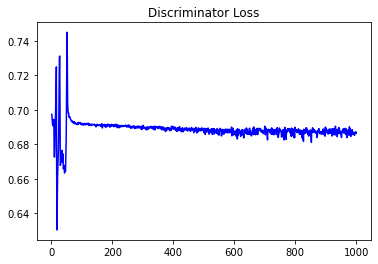

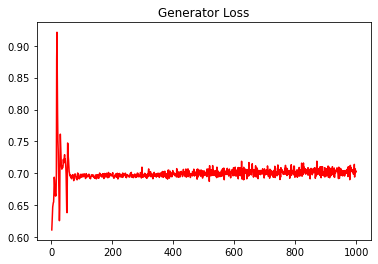

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.2664845126084983


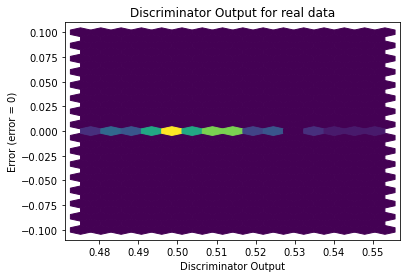

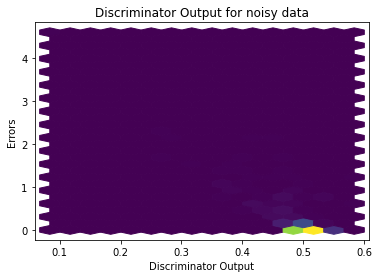

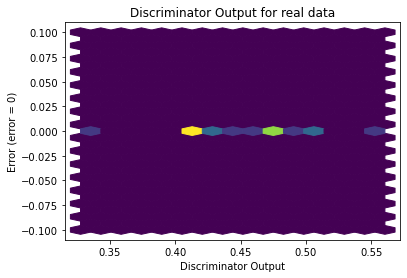

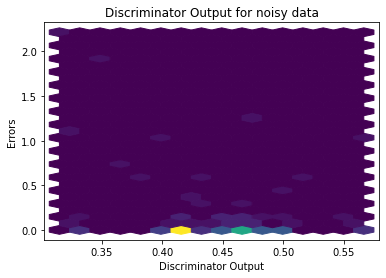

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

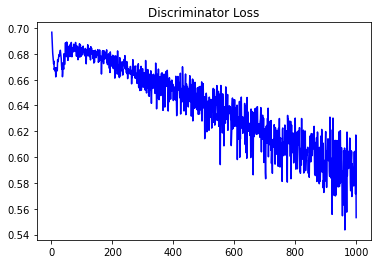

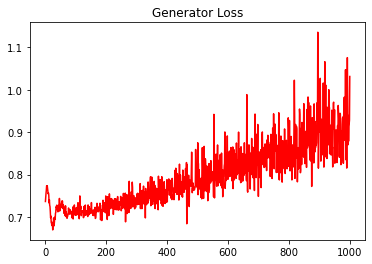

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3171384808588773


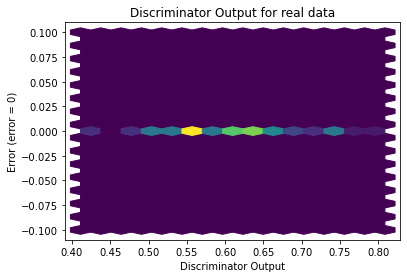

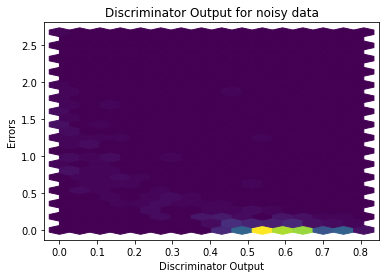

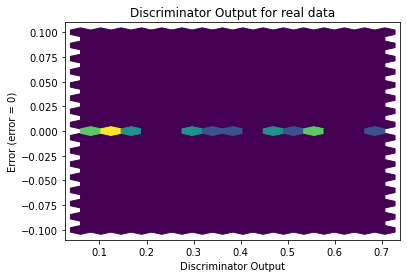

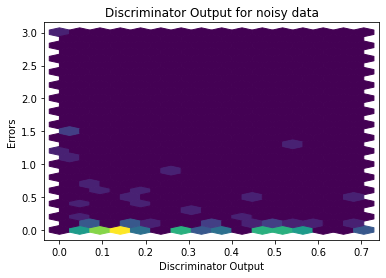

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


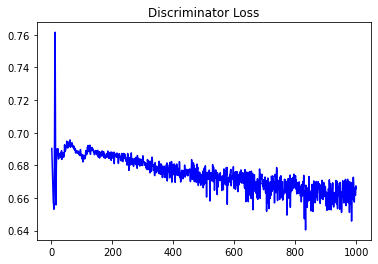

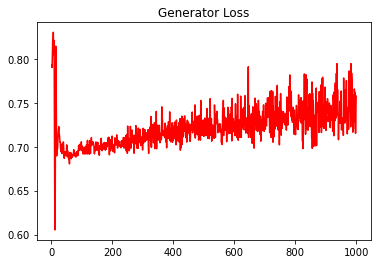

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.33572870212607087


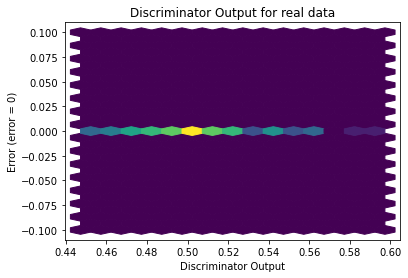

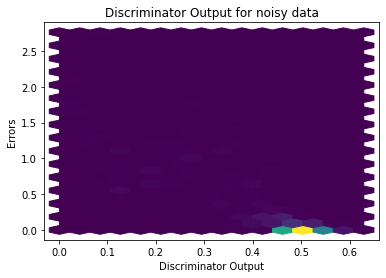

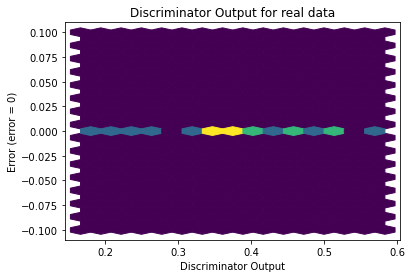

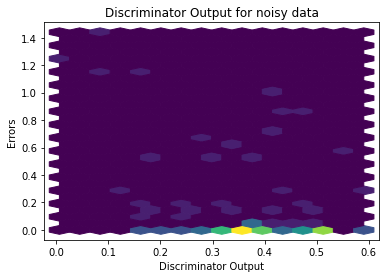

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


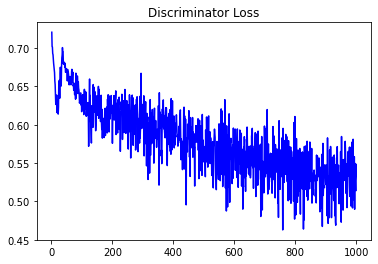

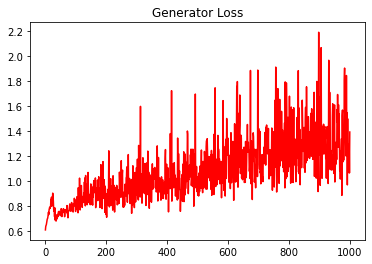

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.38323383855028076


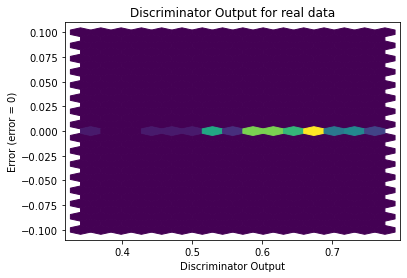

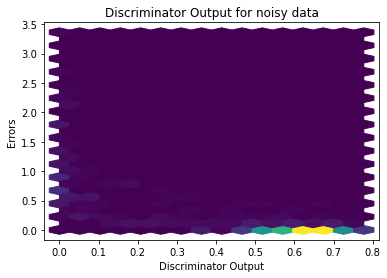

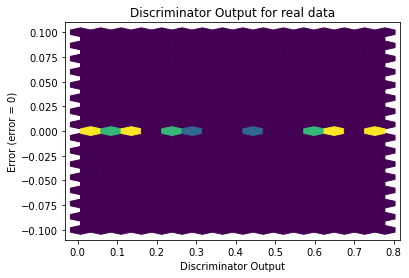

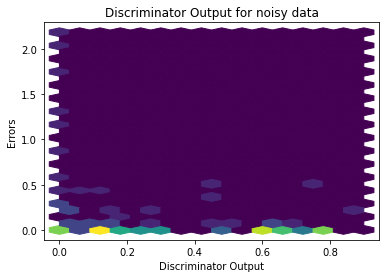

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2176]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3789]], requires_grad=True)
